# Time Series Data Generation - Use Case A

- historical occupancy for 10 years 2013 to 2023
- TBD


In [25]:
# Libraries and generation functions
# Amended from assignment provided code

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
plt.style.use('ggplot')    



# Function to generate time series
def generate_time_series(start_value=0,n_periods=100, frequency='days', trend_slope=0.3, seasonal_period='monthly', seasonal_amplitude=5, noise_level=0.5):
    # Set frequency based on the input (days, months, or weeks)
    start_date = '2013-01-01'
    if frequency == 'days':
        freq = 'D'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    elif frequency == 'months':
        freq = 'M'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    elif frequency == 'weeks':
        freq = 'W'
        time_index = pd.date_range(start=start_date, periods=n_periods, freq=freq)
    else:
        raise ValueError("Frequency should be 'days', 'months', or 'weeks'.")

    # 1. Create a linear trend: A simple increasing trend from 0 to trend_slope * n_periods
    trend = np.linspace(start_value, trend_slope * n_periods, n_periods)  # Linear trend

    # 2. Add seasonality based on the chosen period (weekly, monthly, or annual)
    seasonal_component = np.zeros(n_periods)
    if seasonal_period == 'monthly':
        # One full cycle per year (12 months)
        seasonal_frequency = 2 * np.pi / 12  # For monthly frequency
    elif seasonal_period == 'weekly':
        # One full cycle per year (52 weeks)
        seasonal_frequency = 2 * np.pi / 52  # For weekly frequency
    elif seasonal_period == 'annual':
        # One full cycle per year (365 days)
        seasonal_frequency = 2 * np.pi / 365  # For annual frequency
    else:
        raise ValueError("Seasonal period should be 'monthly', 'weekly', or 'annual'.")

    # Smooth seasonal component (sine wave with the defined frequency)
    seasonal_component = seasonal_amplitude * np.sin(np.linspace(0, seasonal_frequency * n_periods, n_periods))

    # 3. Add minimal noise to the time series to make the residuals more realistic
    noise = np.random.normal(0, noise_level, n_periods)

    # 4. Combine the trend and seasonality
    time_series = trend + seasonal_component + noise

    # Prepare data for CSV output
    data = {'Time': time_index[:len(time_series)], 'Value': time_series}
    df = pd.DataFrame(data)

    '''
    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Value'], label='Generated Time Series')
    plt.title('Generated Time Series Data with Trend and Seasonality')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    #df.to_csv('generated_time_series.csv', index=False)
    #print("Time series data saved to 'generated_time_series.csv'.")
    '''

    return df

#
def decompose_time_series(df, frequency='D'):
    # Ensure the 'Time' column is in datetime format
    df['Time'] = pd.to_datetime(df['Time'])

    # Set 'Time' as the index
    df.set_index('Time', inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(df['Value'], model='additive', period=365 if frequency == 'days' else 12)

    # Plot the decomposed components
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.title('Observed')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.title('Seasonal')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residuals', color='red')
    plt.title('Residuals')

    plt.tight_layout()
    plt.show()


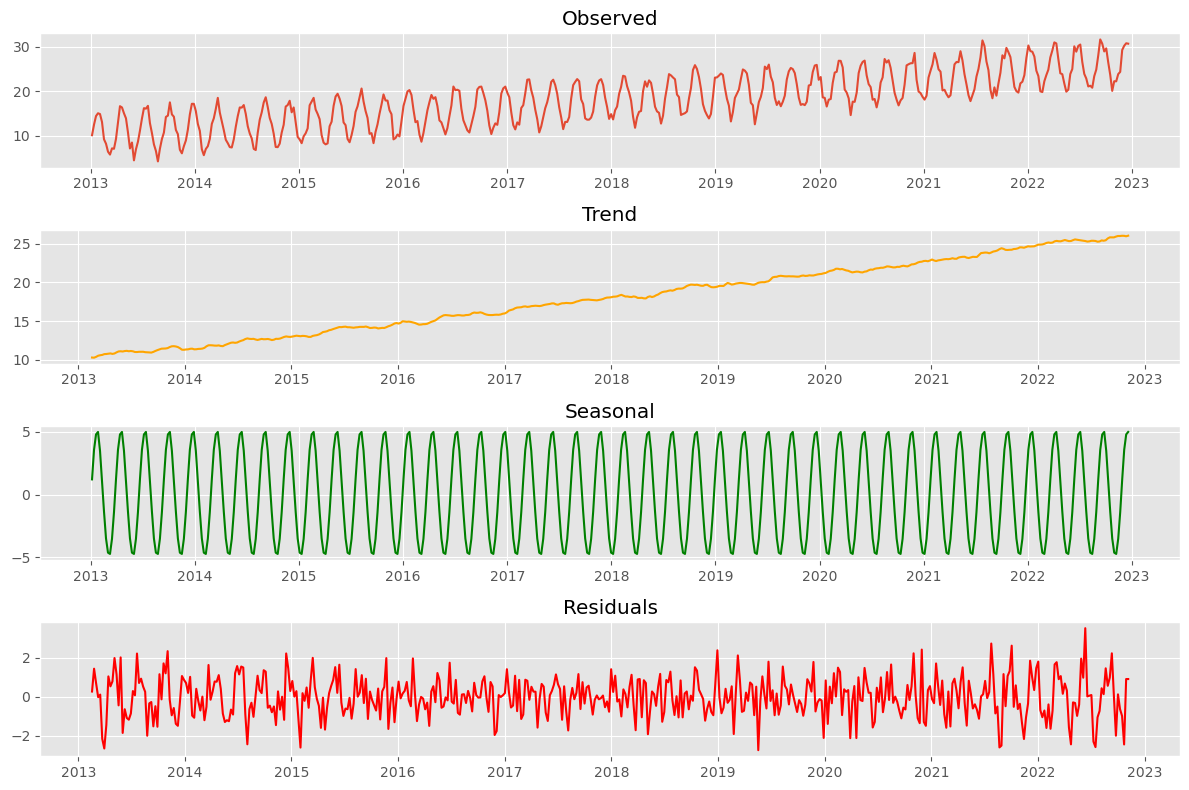

In [26]:
# Example usage of the function

gen_periods = 520
gen_frequency = 'weeks'
gen_seasonal_period = 'monthly'

gen_start = 20
gen_trend_slope = 0.05
gen_seasonal_amplitude = 5
gen_noise_level = 0.9

df = generate_time_series(start_value=10, n_periods=gen_periods, frequency=gen_frequency, trend_slope=gen_trend_slope, 
                          seasonal_period=gen_seasonal_period, seasonal_amplitude=gen_seasonal_amplitude, 
                          noise_level=gen_noise_level)

decompose_time_series(df)

,Hotel,Country,Hemisphere,Climate,Ranking
0,The Place,UK,North,Temperate,3
1,Le Meridien,France,North,Warm,4
2,The Chedi,Oman,North,Hot,5
3,Royal Malewane,South Africa,South,Hot,5
4,Enter Tromso,Norway,North,Cold,1
5,Tuckerbox Inn,Australia,South,Warm,2


<bound method NDFrame.head of     Week_Commencing  The Place  Le Meridien  The Chedi  Royal Malewane  \
0        2013-01-06  19.852207    18.263930  19.735613       21.570515   
1        2013-01-13  21.879686    21.910639  23.167078       21.790519   
2        2013-01-20  22.950308    23.617390  25.182729       26.665159   
3        2013-01-27  23.679890    24.330236  23.668342       25.552094   
4        2013-02-03  22.794297    23.918717  22.600146       26.691733   
..              ...        ...          ...        ...             ...   
515      2022-11-20  31.018788    37.204087  41.643216       47.002686   
516      2022-11-27  33.147976    38.093979  41.856150       47.470104   
517      2022-12-04  34.343545    38.700499  43.740613       50.822936   
518      2022-12-11  34.989908    40.363414  45.742682       50.796734   
519      2022-12-18  34.542813    39.700237  45.110378       50.455285   

     Enter Tromso  Tuckerbox Inn  
0       22.720619      19.472292  
1       21.

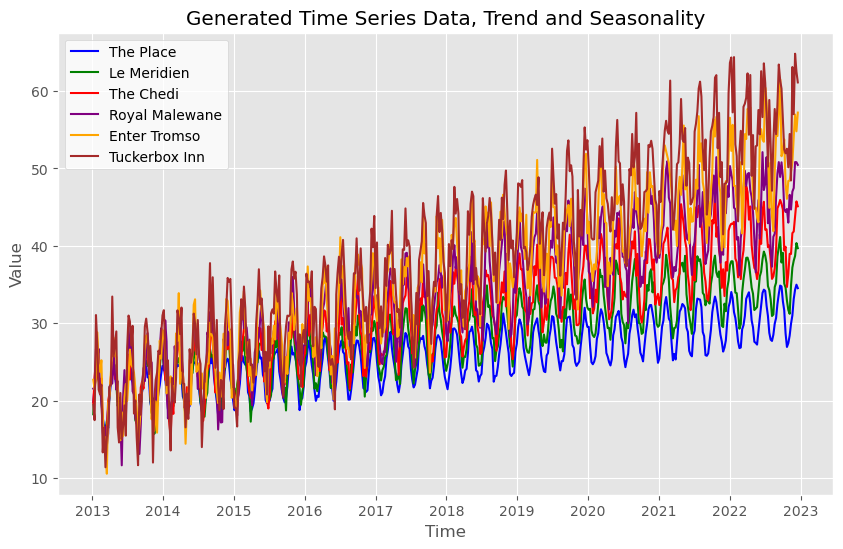

In [27]:
# Generate Occupancy Data

# 10 years of weekly occupancy data for several different hotels, resorts in different locations
# Locations have different weather patterns/seasons and local events, holiday seasons

# Establish resorts with name, location, climate, price ranking
#
hotels_dict = { 
        'Hotel': ['The Place', 'Le Meridien', 'The Chedi', 'Royal Malewane', 'Enter Tromso', 'Tuckerbox Inn'],
        'Country': ['UK', 'France', 'Oman', 'South Africa', 'Norway', 'Australia'],
        'Hemisphere': ['North', 'North', 'North', 'South', 'North', 'South'],
        'Climate': ['Temperate', 'Warm', 'Hot', 'Hot', 'Cold', 'Warm'],
        'Ranking': [3,4,5,5,1,2]
        }
hotels_df = pd.DataFrame(hotels_dict)
display(hotels_df)

# Generate an occupancy history time series for each hotel. 10 years with weekly values
#
gen_periods = 520
gen_frequency = 'weeks'
gen_seasonal_period = 'monthly'

gen_start = 20
gen_trend_slope = 0.05
gen_seasonal_amplitude = 3
gen_noise_level = 0

hotel_occupancy_history_df = pd.DataFrame()
for next_row in hotels_df.itertuples():
    # Amend time series parameters for each hotel. Increasing trend, seasonal amplitude, noise
    # TO-DO: Change seasonality for hemisphere, local holidays etc .....
    gen_trend_slope += 0.01
    gen_seasonal_amplitude += 0.5
    gen_noise_level += 0.5

    time_series_df = generate_time_series(start_value=gen_start,n_periods=gen_periods, frequency=gen_frequency, 
                                          trend_slope=gen_trend_slope, seasonal_period=gen_seasonal_period, 
                                          seasonal_amplitude=gen_seasonal_amplitude, noise_level=gen_noise_level)
    
    # Add a column of time series for the hotel
    time_series_df.rename(columns={'Time': 'Week_Commencing', 'Value': next_row.Hotel}, inplace=True)
    if hotel_occupancy_history_df.empty:
        hotel_occupancy_history_df = time_series_df
    else:
        hotel_occupancy_history_df[next_row.Hotel] = time_series_df[next_row.Hotel]

# Display all the generated times series
display(hotel_occupancy_history_df.head)

# Plot the sample
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title(f'Generated Time Series Data, Trend and Seasonality')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Define plot for each hotel
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for i, next_row in enumerate(hotels_df.itertuples()):
        hotel = next_row.Hotel
        ax.plot(hotel_occupancy_history_df['Week_Commencing'], hotel_occupancy_history_df[hotel], 
                        color=colors[i % len(colors)], label=hotel)

ax.legend(loc='upper left', facecolor='white')
plt.show()



'Decomposition for: The Place'

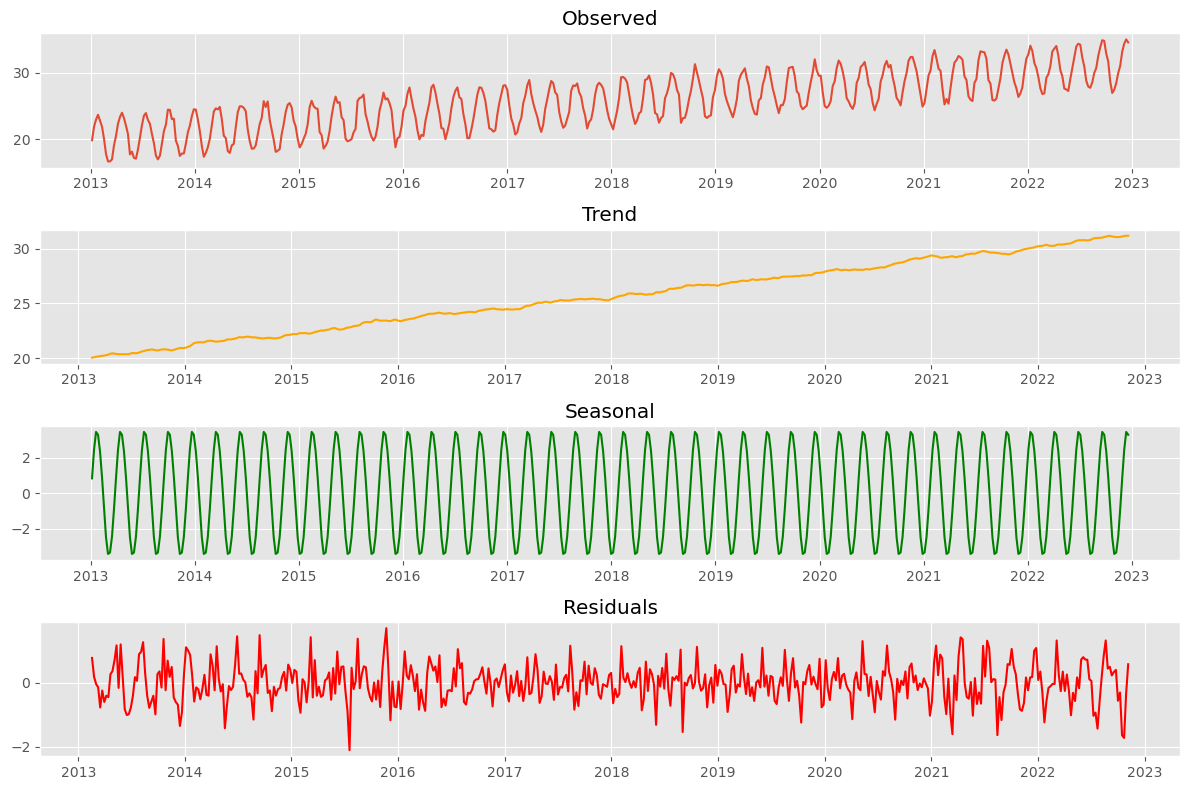

'Decomposition for: Le Meridien'

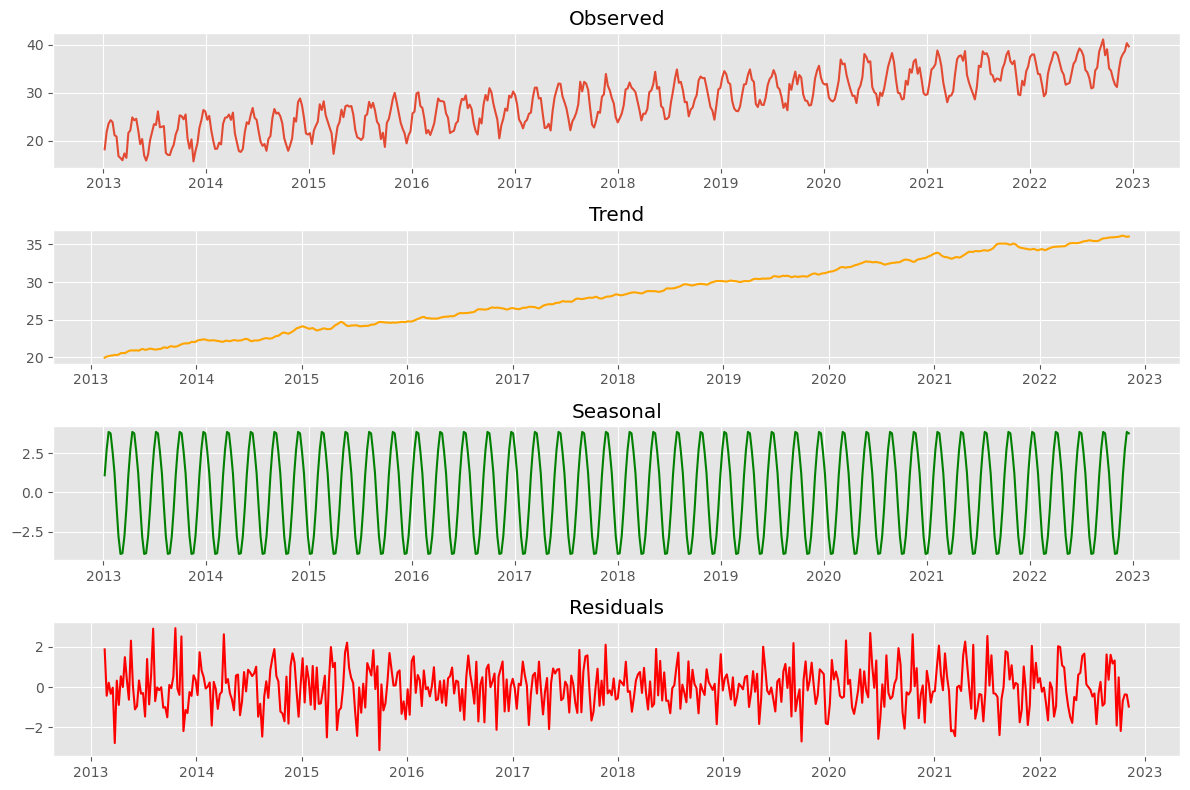

'Decomposition for: The Chedi'

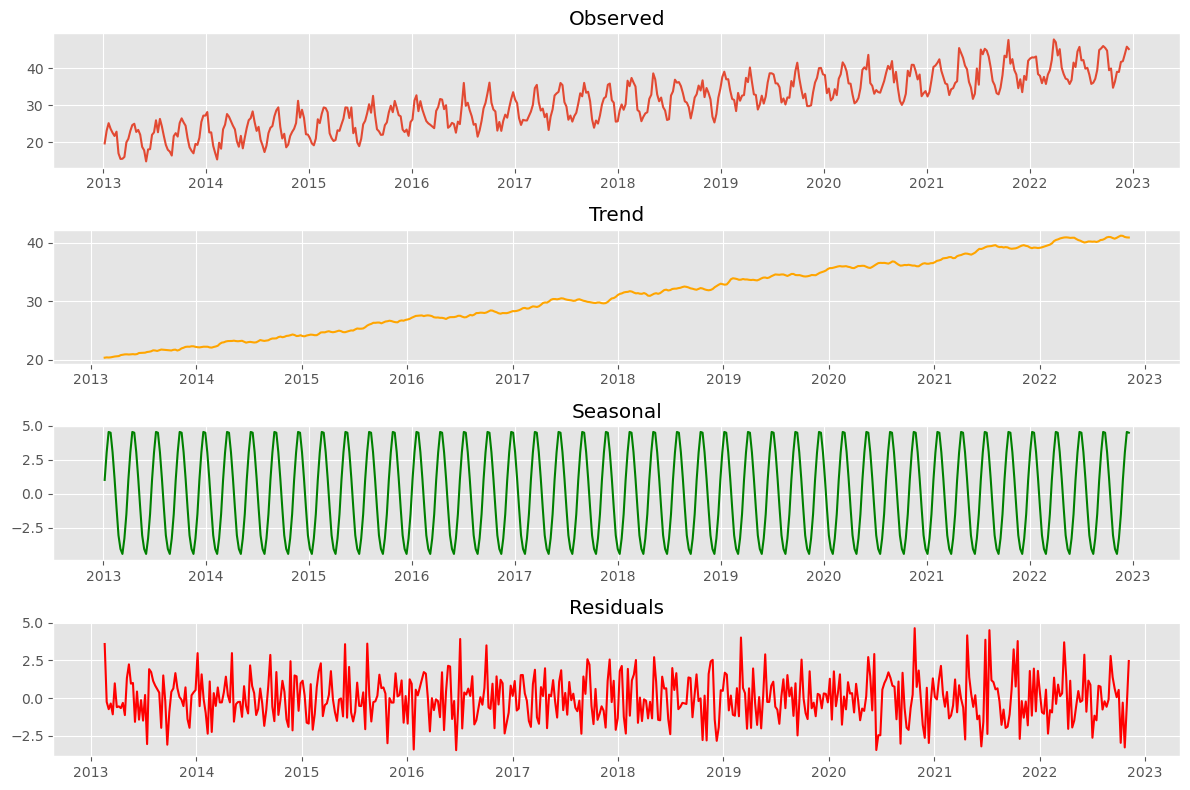

'Decomposition for: Royal Malewane'

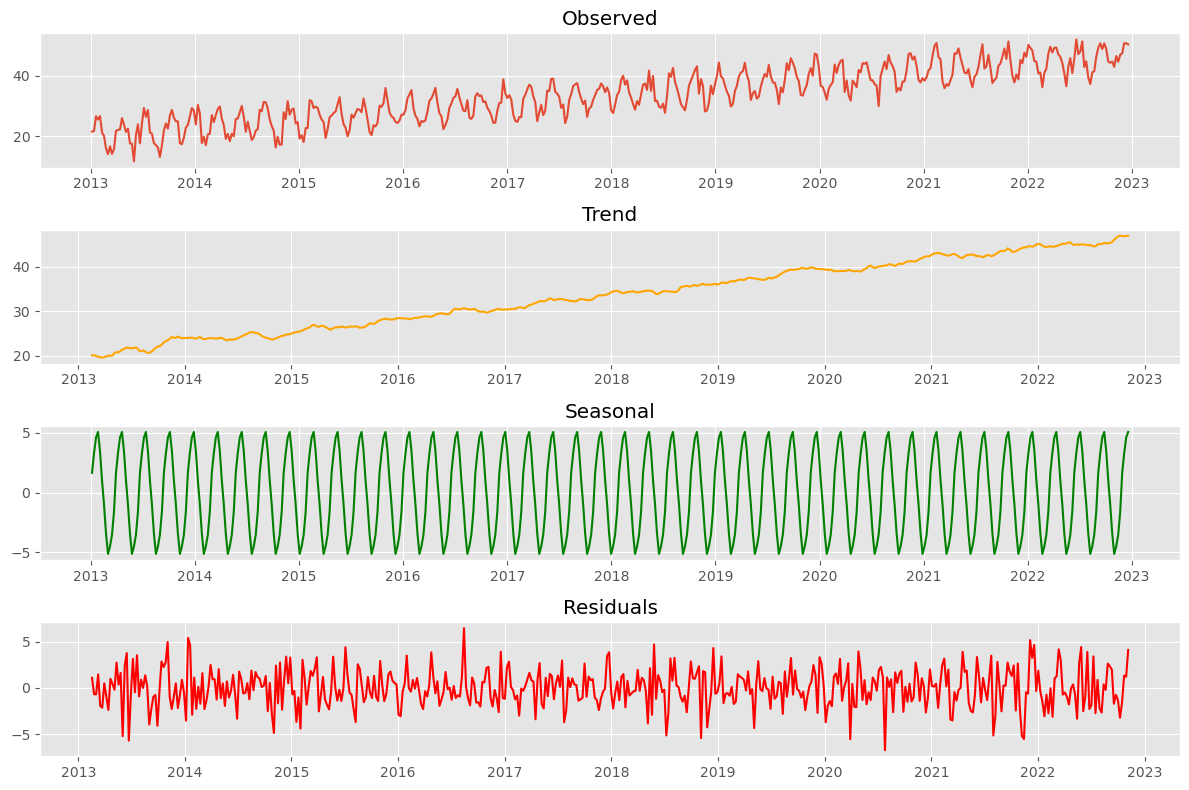

'Decomposition for: Enter Tromso'

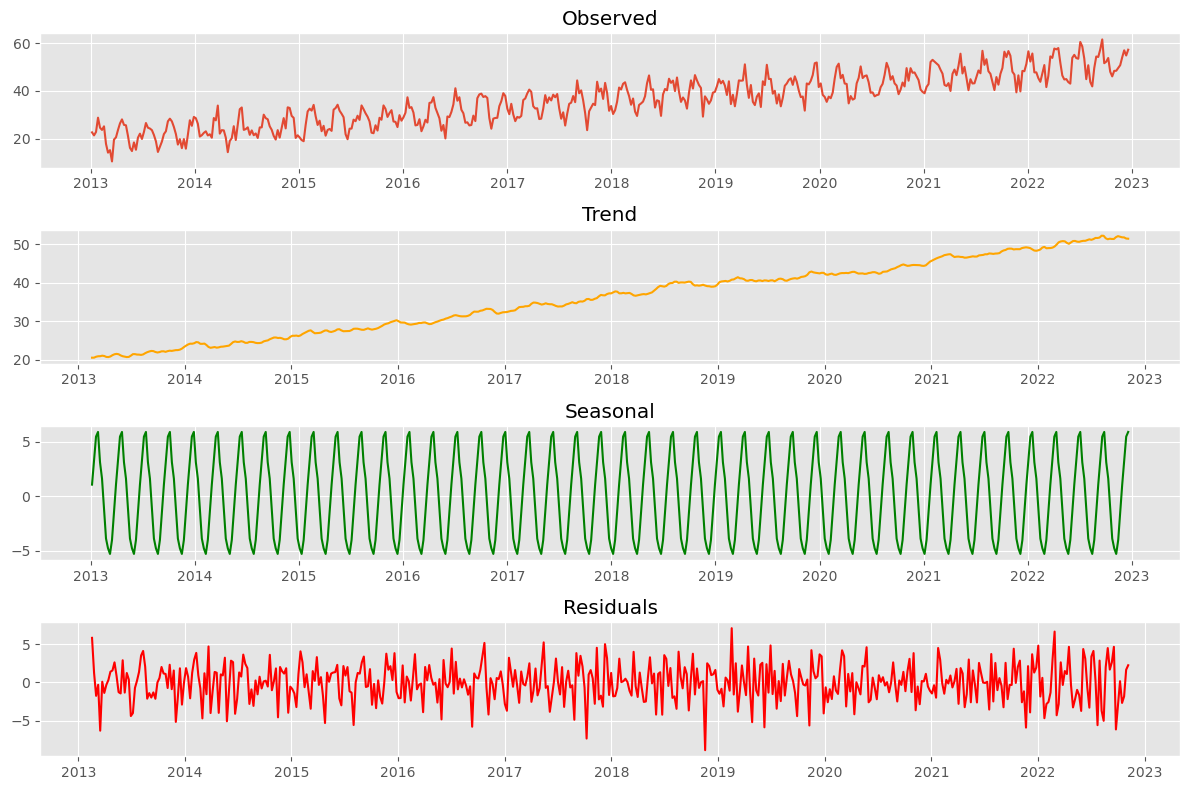

'Decomposition for: Tuckerbox Inn'

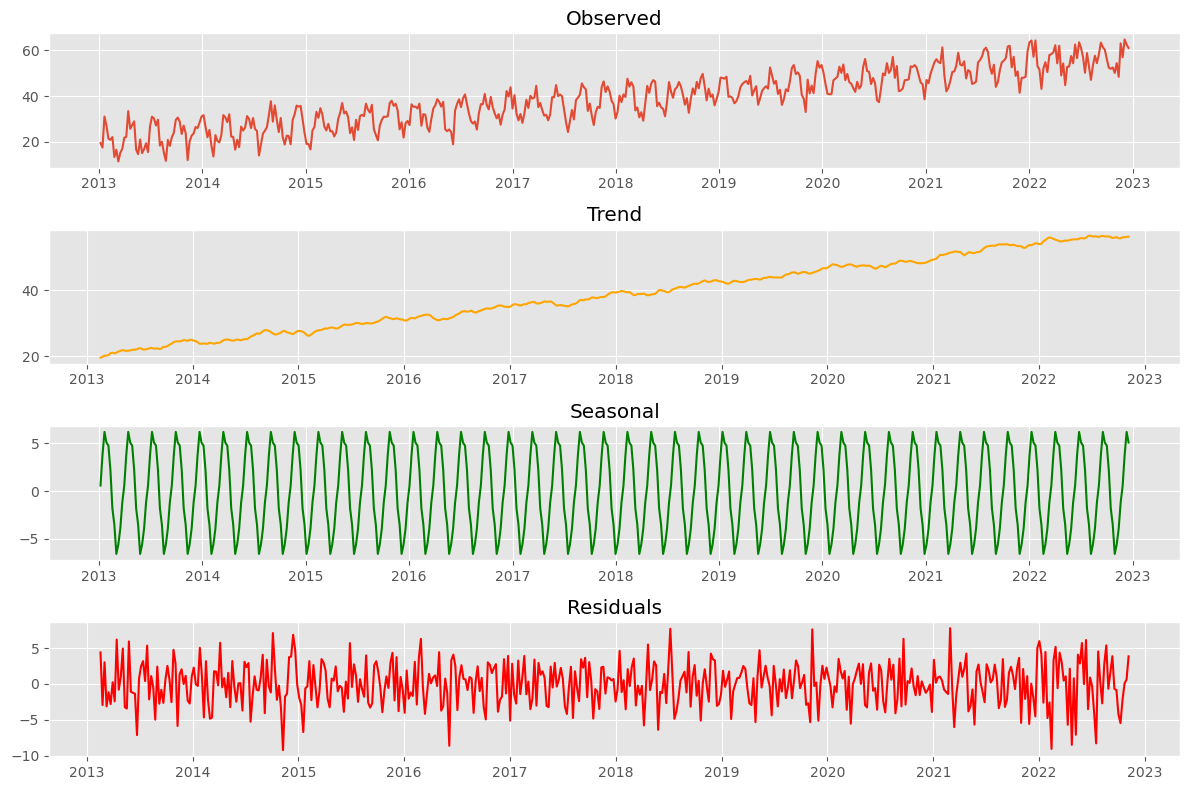

In [28]:
# Show decomposition for each hotel

for next_row in hotels_df.itertuples():
    hotel = next_row.Hotel
    data = {'Time': hotel_occupancy_history_df['Week_Commencing'], 'Value': hotel_occupancy_history_df[hotel]}
    time_series_df = pd.DataFrame(data)
    display(f'Decomposition for: {hotel}')
    decompose_time_series(time_series_df)

